In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv('scopus (1).csv')
df.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Menke J.; Nahal Y.; Bjerrum E.J.; Kabeshov M.;...,"Menke, Janosch (57221346619); Nahal, Yasmine (...",57221346619; 59164048600; 7801393192; 78015430...,Metis: a python-based user interface to collec...,2024,Journal of Cheminformatics,16.0,1,100,NaN,...,NaN,NaN,NaN,English,J. Cheminformatics,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85201269712
1,Peres M.A.; Sanches G.; Paiva A.; Pagliosa P.,"Peres, M.A. (59309079200); Sanches, G. (593087...",59309079200; 59308733200; 57193995633; 2445120...,Parallel isogeometric boundary element analysi...,2024,Computer Methods in Applied Mechanics and Engi...,432.0,NaN,117296,NaN,...,NaN,CMMEC,NaN,English,Comput. Methods Appl. Mech. Eng.,Article,Final,NaN,Scopus,2-s2.0-85202809787
2,Hecht C.; Pournaghi A.; Schwinger F.; Spreuer ...,"Hecht, Christopher (57218880433); Pournaghi, A...",57218880433; 59270773500; 57195215928; 5755879...,Global electric vehicle charging station site ...,2024,eTransportation,22.0,NaN,100358,NaN,...,NaN,NaN,NaN,English,eTransp.,Article,Final,NaN,Scopus,2-s2.0-85201462819
3,Pathak A.K.; Kural S.; Singh S.; Kumar L.; Yad...,"Pathak, Abhay Kumar (58781649500); Kural, Sukh...",58781649500; 58782307100; 58595953200; 5755006...,Development of a robust and generalizable algo...,2024,Scientific Reports,14.0,1,18774,NaN,...,NaN,NaN,39138232.0,English,Sci. Rep.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85201248339
4,Onteru R.R.; Sandeep V.,"Onteru, Rupesh Rayalu (58450147800); Sandeep, ...",58450147800; 6504759805,An intelligent model for efficient load foreca...,2024,Discover Sustainability,5.0,1,170,NaN,...,NaN,NaN,NaN,English,Discov Sustain,Article,Final,NaN,Scopus,2-s2.0-85200055845


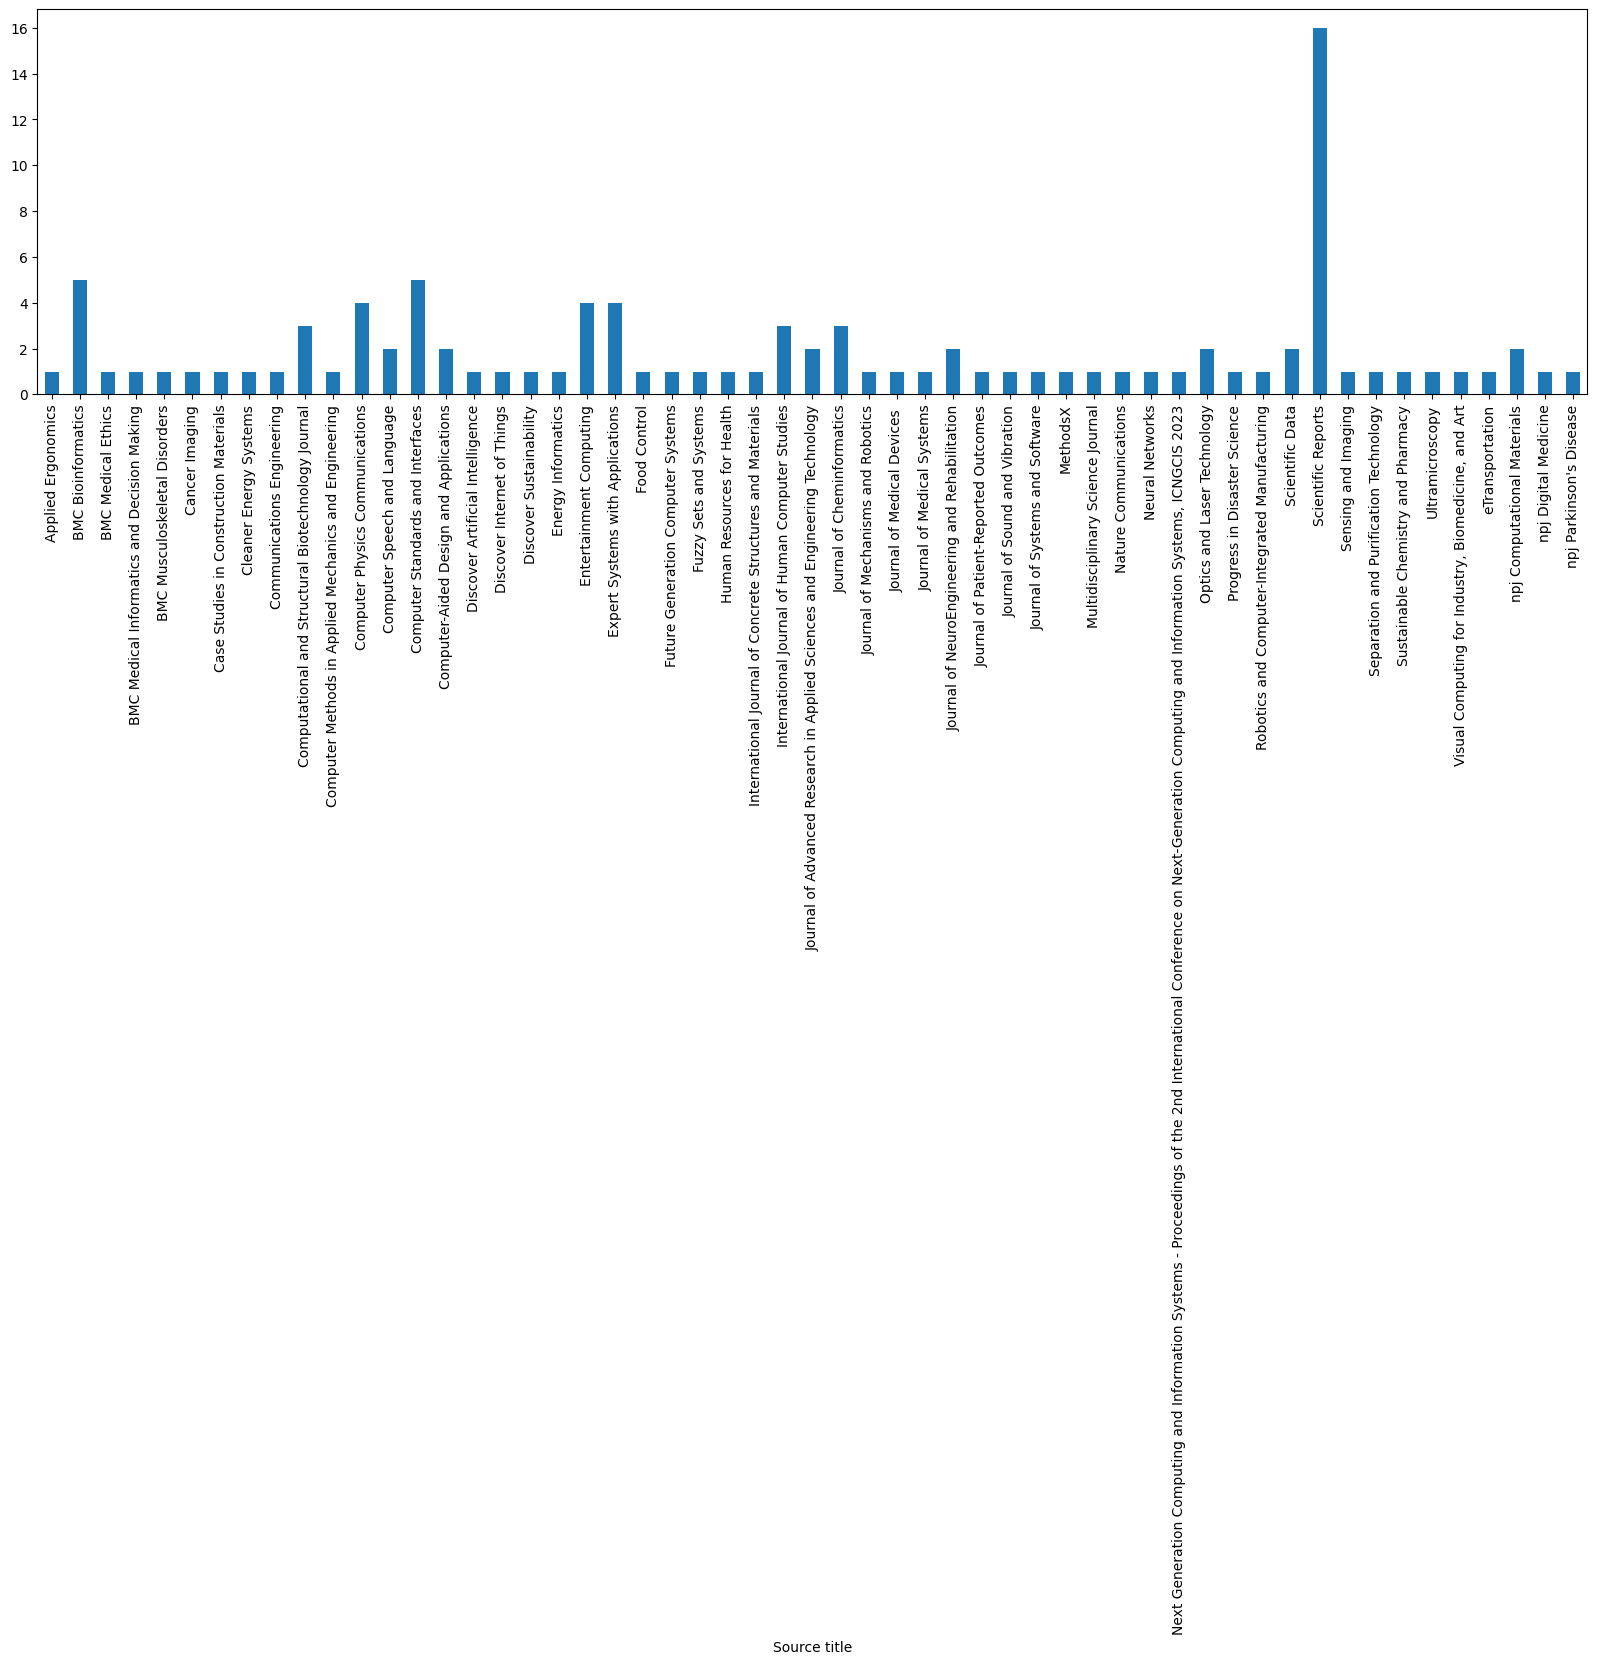

In [ ]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 5))
grouped.plot(kind='bar')
plt.show()

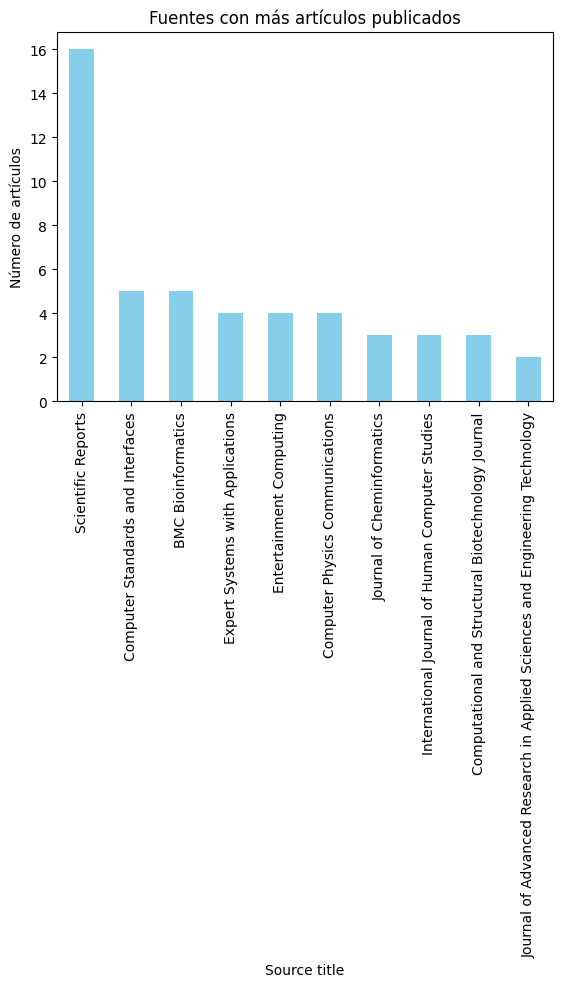

In [ ]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

In [ ]:
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,based,15,1.0
1,system,10,2.0
2,user,9,3.0
3,using,8,4.0
4,analysis,8,4.0
5,evaluation,7,5.0
6,management,6,6.0
7,data,6,6.0
8,tool,6,6.0
9,development,6,6.0


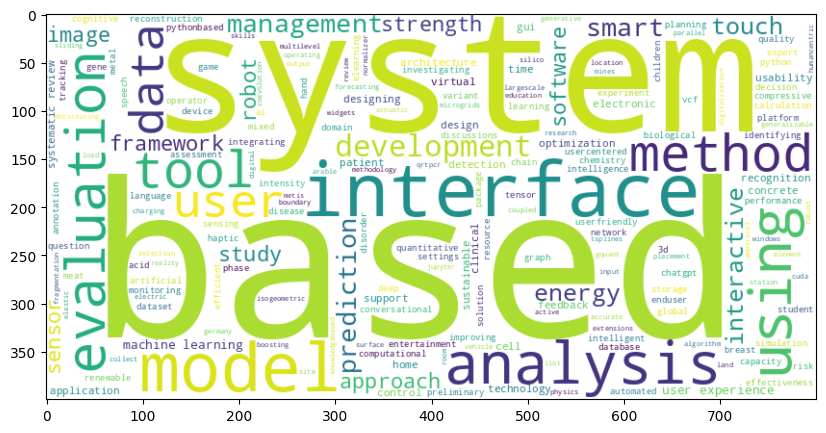

In [ ]:
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

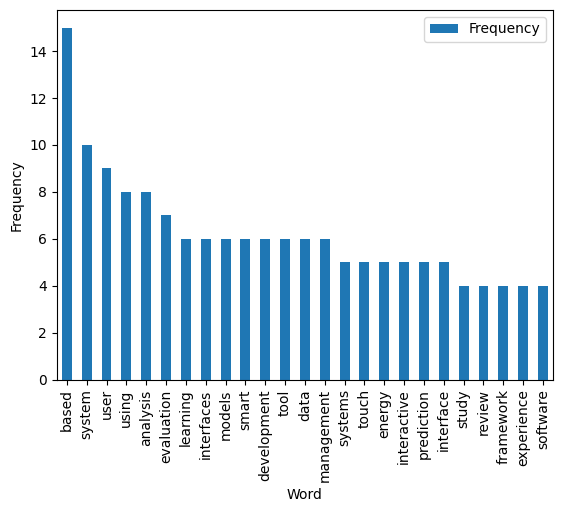

In [ ]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-17-19d4247ffbc3>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


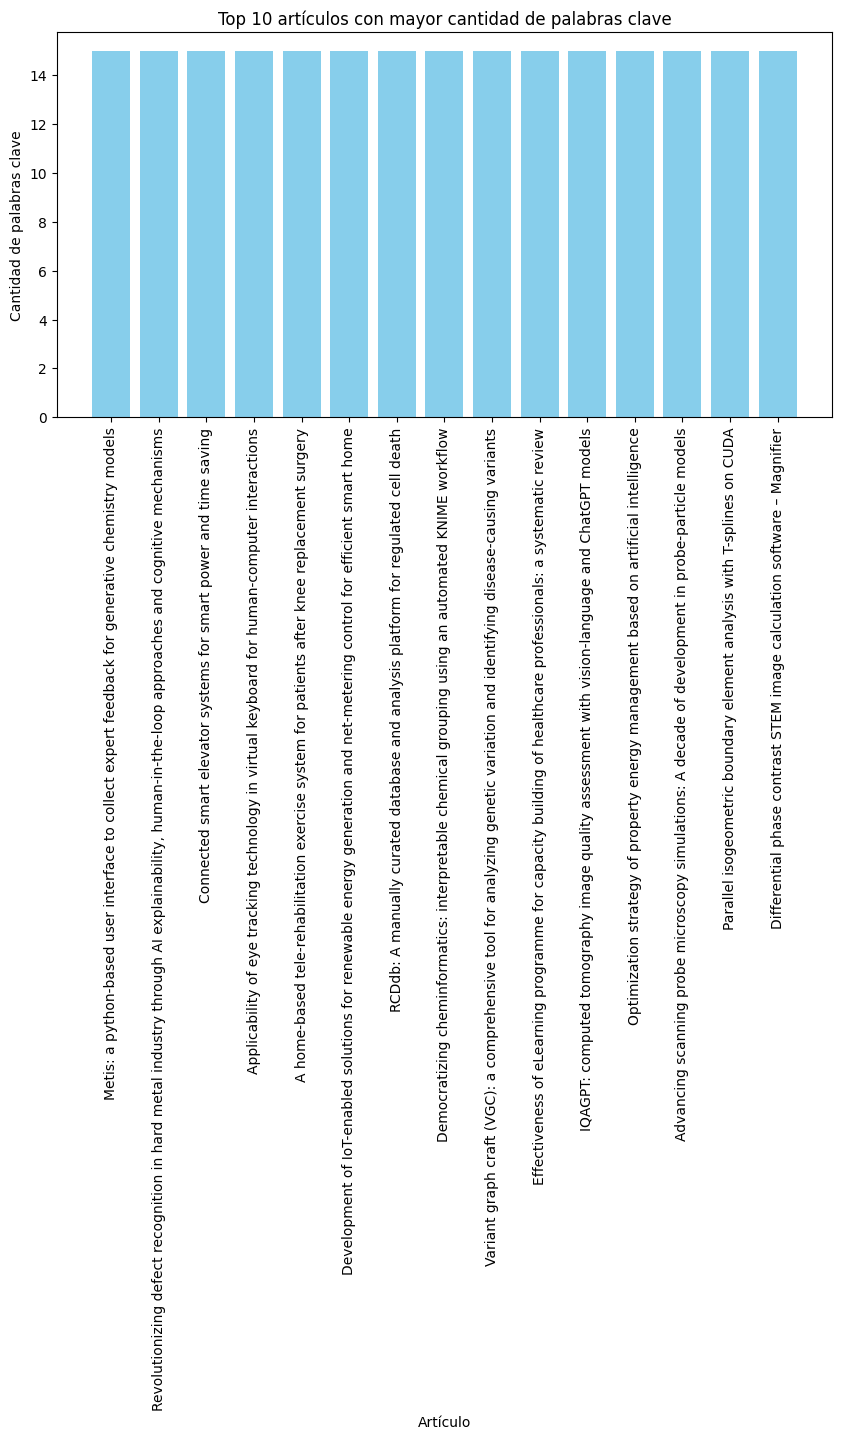

In [ ]:
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [ ]:
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
One challenge that current de novo drug design models face is a disparity between the user’s expectations and the actual output of the model in practical applications. By providing chemists the opportunity to give detailed feedback, allows researchers to capture more efficiently the chemist’s implicit knowledge and preferences. This knowledge is crucial to align the chemist’s idea with the de novo design agents.

Resumen 2:
In this work, a platform that extends the aforementioned concepts with ones coming from Industry 5.0 like reconciliation and collaboration between humans and machines is introduced. In particular, the platform, that is built on a micro-service architecture to enable its software sustainability, is powered by machine and deep learning models for defect detection and localization. To enhance further the human and AI collaboration, XAI mechanisms are included in the platform,to enable the experts to gain useful insights regarding the operation of the AI mode

In [ ]:
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: Metis: a python-based user interface to collect expert feedback for generative chemistry models
Summary: One challenge that current de novo drug design models face is a disparity between the user’s expectations and the actual output of the model in practical applications. By providing chemists the opportunity to give detailed feedback, allows researchers to capture more efficiently the chemist’s implicit knowledge and preferences.

Title: Advancements in biotransformation pathway prediction: enhancements, datasets, and novel functionalities in enviPath
Summary: Scientific contribution: The main scientific contributions are the development of a pathway prediction model applicable to diverse chemicals, a specialized evaluation method for holistic performance assessment, and a novel applicability domain algorithm for user-specific performance estimation. Data and prediction system are freely available both via a web interface and a public REST API.

Title: Tele-Impedance control of

In [ ]:
import pandas as pd
# Combine all author keywords into a single string
all_keywords = ' '.join(df['Author Keywords'].fillna('').astype(str))

# Clean the text
all_keywords = clean_text(all_keywords)

# Tokenize the text
tokens = word_tokenize(all_keywords)

# Calculate word frequencies
fdist = FreqDist(tokens)

# Create a DataFrame from the frequency distribution
keyword_df = pd.DataFrame(fdist.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

# Display the DataFrame
keyword_df.head(10)



,Word,Frequency
6,learning,19
9,interface,14
8,user,12
3,design,11
5,machine,11
146,system,11
137,model,10
17,analysis,9
71,experience,7
31,artificial,7


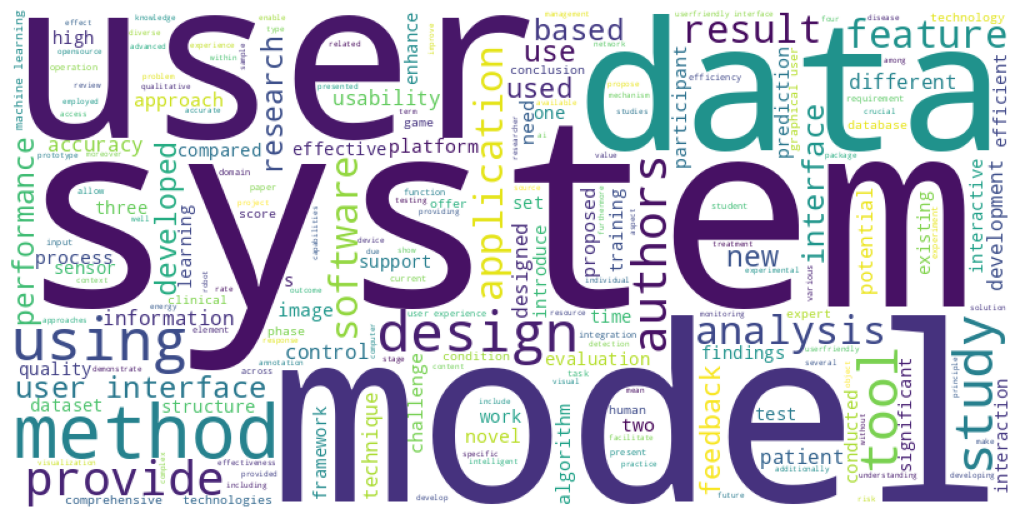

In [ ]:
import matplotlib.pyplot as plt
# Combine all abstracts into a single string
all_abstracts = ' '.join(df['Abstract'].fillna('').astype(str))

# Clean the text
all_abstracts = clean_text(all_abstracts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_abstracts)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
import pandas as pd
from collections import Counter

# Load the dataframe
df = pd.read_csv('scopus (2).csv')

# Combine all references into a single string
all_references = ' '.join(df['References'].fillna('').astype(str))

# Split the string into individual references
references = all_references.split('; ')

# Count the frequency of each reference
reference_counts = Counter(references)

# Create a DataFrame from the reference counts
reference_df = pd.DataFrame.from_dict(reference_counts, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency
reference_df = reference_df.sort_values(by='Frequency', ascending=False)

# Display the DataFrame
reference_df.head(10)


,Frequency
"Hochreiter, S., Schmidhuber, J., Long short-term memory (1997) Neural Computation, 9 (8), pp. 1735-1780",2
"Car, R., Parrinello, M., (1985) Phys. Rev. Lett., 55, p. 2471",2
"Vanderbilt, D., (1990) Phys. Rev. B, 41, p. 7892",2
"Goedecker, S., Maschke, K., (1992) Phys. Rev. B, 45, p. 1597",2
"Bengio, Y., Simard, P., Frasconi, P., Learning long-term dependencies with gradient descent is difficult (1994) IEEE Transactions on Neural Networks, 5 (2), pp. 157-166",1
"Bahdanau, D., Cho, K., Bengio, Y., Neural machine translation by jointly learning to align and translate (2014) CoRR",1
"Britz, D., Goldie, A., Luong, M.-T., Le, Q.V., Massive exploration of neural machine translation architectures (2017) CoRR",1
"Cheng, J., Dong, L., Lapata, M., (2016) Long Short-term Memory-networks for Machine Reading",1
"Cho, K., Van Merrienboer, B., Gulcehre, C., Bougares, F., Schwenk, H., Bengio, Y., Learning phrase representations using rnn encoder-decoder for statistical machine translation (2014) CoRR",1
"Chollet, F., (2016) Xception: Deep Learning with Depthwise Separable Convolutions",1


<ipython-input-85-3400edba9df3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Author', data=author_freq_df, palette='viridis')


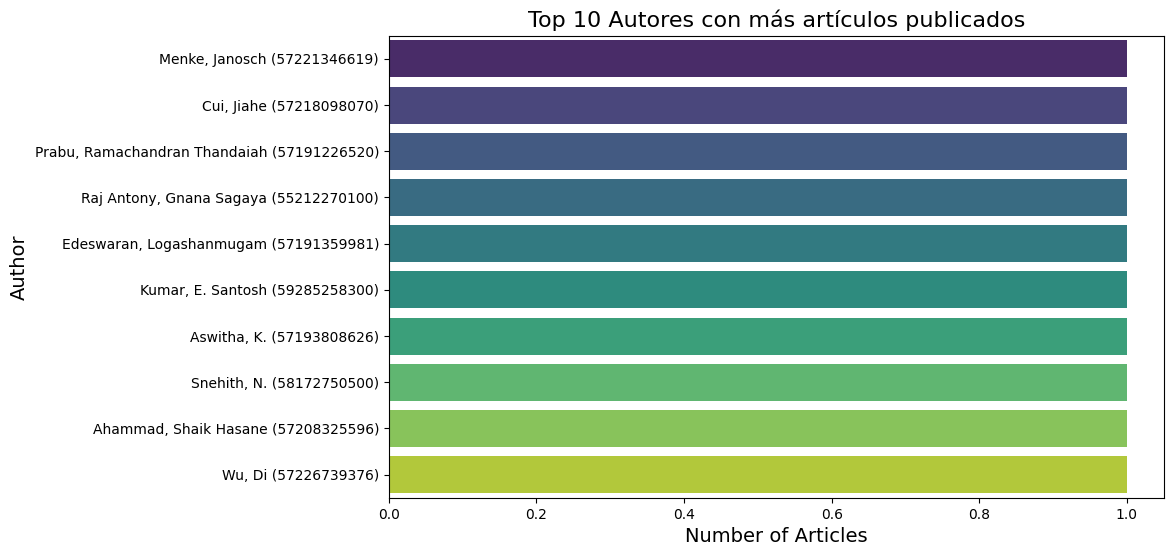

In [85]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all author strings into a single list (each author entry may have multiple names separated by semicolon)
all_authors = df['Author full names'].astype(str).tolist()

# Split each entry by semicolon, assuming authors are separated by this character
authors_list = []
for author_str in all_authors:
    authors = [author.strip() for author in author_str.split(';')]  # El delimitador es ';'
    authors_list.extend(authors)

# Count occurrences of each full author name (i.e., number of articles they contributed to)
author_counts = Counter(authors_list)

# Create a DataFrame from the author counts
author_freq_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Frequency'])

# Sort the DataFrame by frequency in descending order and select top 10 authors
author_freq_df = author_freq_df.sort_values(by=['Frequency'], ascending=False).head(10)

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Author', data=author_freq_df, palette='viridis')

# Add title and labels
plt.title('Top 10 Autores con más artículos publicados', fontsize=16)
plt.xlabel('Number of Articles', fontsize=14)
plt.ylabel('Author', fontsize=14)

# Show the plot
plt.show()



In [ ]:
import pandas as pd
from collections import Counter

# Combine all author strings into a single list (each author entry may have multiple names separated by comma or semicolon)
all_authors = df['Author full names'].astype(str).tolist()

# Split each entry by comma or semicolon, assuming authors are separated by these characters
authors_list = []
for author_str in all_authors:
    authors = [author.strip() for author in author_str.split(';')]  # Ajusta el delimitador si es necesario (puede ser ';')
    authors_list.extend(authors)

# Count occurrences of each full author name
author_counts = Counter(authors_list)

# Create a DataFrame from the author counts
author_freq_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Frequency'])

# Sort the DataFrame by frequency in descending order
author_freq_df = author_freq_df.sort_values(by=['Frequency'], ascending=False)

# Display the top 10 authors
author_freq_df.head(10)



,Author,Frequency
0,"Menke, Janosch (57221346619)",1
409,"Cui, Jiahe (57218098070)",1
402,"Prabu, Ramachandran Thandaiah (57191226520)",1
403,"Raj Antony, Gnana Sagaya (55212270100)",1
404,"Edeswaran, Logashanmugam (57191359981)",1
405,"Kumar, E. Santosh (59285258300)",1
406,"Aswitha, K. (57193808626)",1
407,"Snehith, N. (58172750500)",1
408,"Ahammad, Shaik Hasane (57208325596)",1
410,"Wu, Di (57226739376)",1


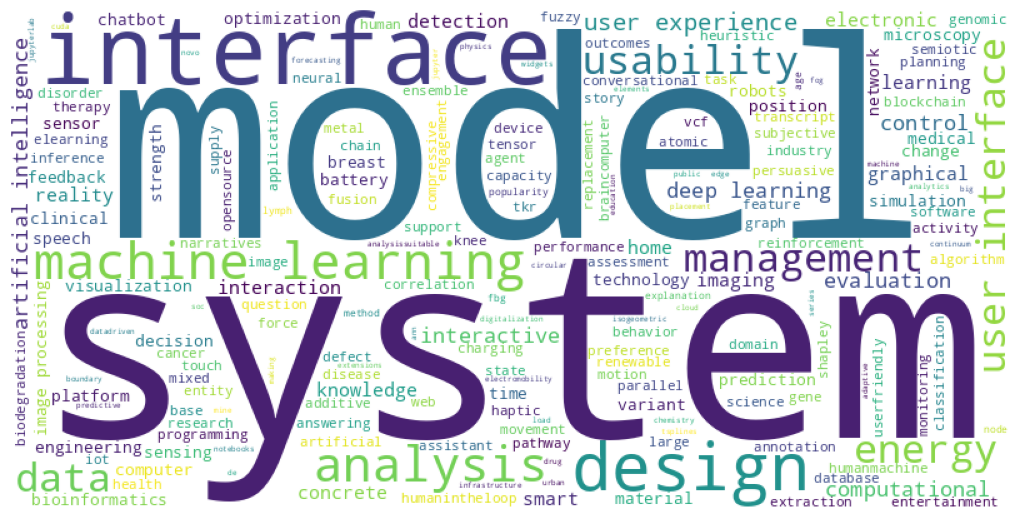

In [ ]:
import matplotlib.pyplot as plt
# Combine all author keywords into a single string
all_keywords = ' '.join(df['Author Keywords'].fillna('').astype(str))

# Clean the text
all_keywords = clean_text(all_keywords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
